In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_json("MyData\StreamingHistory0.json")
dataframe=pd.DataFrame(data)
print(dataframe)

               endTime           artistName        trackName  msPlayed
0     2022-10-04 11:11         Taylor Swift         Gorgeous      5510
1     2022-10-05 02:47         Armaan Malik        Konjam -1         0
2     2022-10-05 02:51         Armaan Malik        Konjam -1    173686
3     2022-10-05 02:55         Armaan Malik       Konjam - 2    219194
4     2022-10-05 02:59         Taylor Swift           willow    214706
...                ...                  ...              ...       ...
7724  2023-10-03 10:35     Sreerama Chandra        Pougalaam    284306
7725  2023-10-03 10:39                  BTS          Friends    199338
7726  2023-10-03 10:44  Anirudh Ravichander   Kannaana Kanne    267340
7727  2023-10-03 10:49          S.P. Charan  Kadavul Thandha    318026
7728  2023-10-03 10:55          A.R. Rahman  Newyork Nagaram    279964

[7729 rows x 4 columns]


In [3]:
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7729 entries, 0 to 7728
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     7729 non-null   object
 1   artistName  7729 non-null   object
 2   trackName   7729 non-null   object
 3   msPlayed    7729 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 241.7+ KB


,endTime,artistName,trackName,msPlayed
0,2022-10-04 11:11,Taylor Swift,Gorgeous,5510
1,2022-10-05 02:47,Armaan Malik,Konjam -1,0
2,2022-10-05 02:51,Armaan Malik,Konjam -1,173686
3,2022-10-05 02:55,Armaan Malik,Konjam - 2,219194
4,2022-10-05 02:59,Taylor Swift,willow,214706


In [4]:
dataframe.describe()

,msPlayed
count,7.729000e+03
mean,1.702862e+05
std,1.137562e+05
min,0.000000e+00
25%,4.181900e+04
50%,1.985170e+05
75%,2.477940e+05
max,1.796988e+06


In [8]:
dataframe.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [15]:
dataframe[['endTime','artistName','trackName']].describe()

,endTime,artistName,trackName
count,7729,7729,7729
unique,6433,247,663
top,2023-09-20 10:41,Anirudh Ravichander,Konjam -1
freq,16,1078,329


In [85]:
song_play_counts = dataframe.groupby('trackName')['msPlayed'].sum().reset_index()
least=song_play_counts.sort_values(by='msPlayed').iloc[0]
least_song=least['trackName']

In [37]:
dataframe['endTime']=pd.to_datetime(dataframe['endTime'])

In [39]:
dataframe['duration']=dataframe['msPlayed']/60000

In [86]:
top=song_play_counts.sort_values(by='msPlayed',ascending=False).iloc[0]
top_song=top['trackName']

# Exploratory Data Analysis

<Axes: ylabel='trackName'>

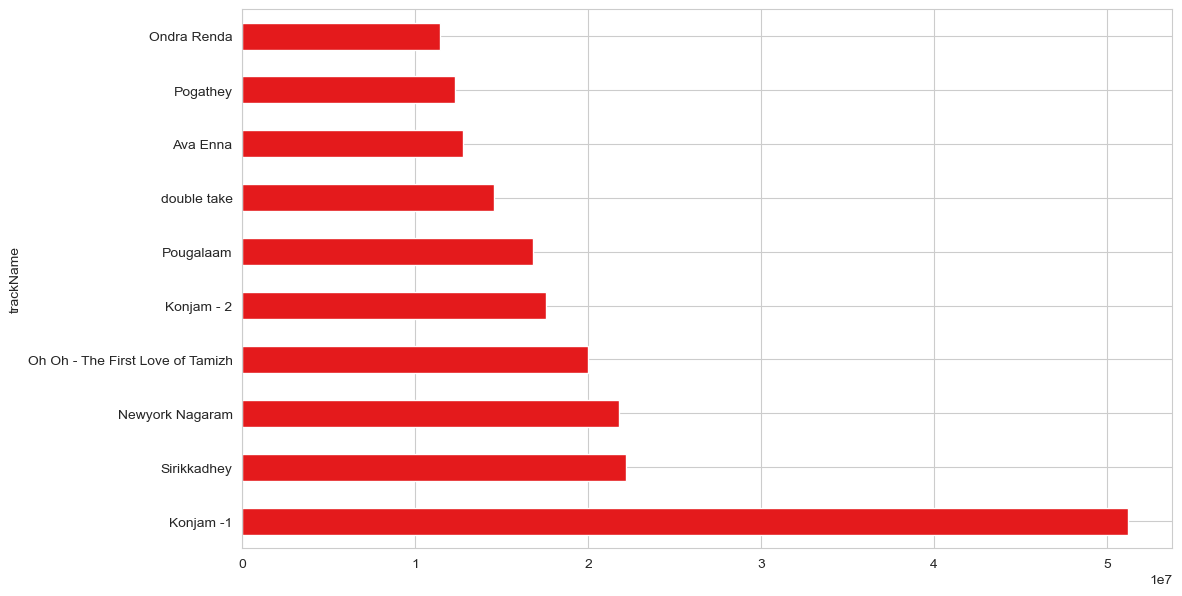

In [75]:
fig1, ax1 = plt.subplots(figsize=(12,7))
dataframe.groupby('trackName')['msPlayed'].sum().nlargest(10).sort_values(ascending=False).plot(kind='barh')

In [88]:
print("Summary Report for my own Spotify data analysis")
print("Least played song: {} \nMost played song: {}".format(least_song,top_song))

Summary Report for my own Spotify data analysis
Least played song: Yennuyire - Male Vocals 
Most played song: Konjam -1
